# SBCAS2020 - March - Hierarchical and Kmeans

# 1. Import

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from time import time
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import *
import seaborn as sns
sns.set()

In [ ]:
!pip install geopandas

     |████████████████████████████████| 931kB 3.3MB/s 
     |████████████████████████████████| 10.4MB 16.2MB/s 
     |████████████████████████████████| 14.7MB 55.4MB/s 


In [ ]:
import geopandas

In [ ]:
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=7db3113a2efd9140842c9b55b49b9dcbacf68571eba016783c3614ae538a912b
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset2.csv to dataset2.csv
time: 12.6 s


## Read CSV

In [ ]:
df = pd.read_csv('march-dataset.csv', sep=',', index_col='location')

time: 24.6 ms


## Verify import

In [ ]:
df.head()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
location,,,,,,,,,,
Afghanistan,0.043011,0.43,0.54,0.03,0.040323,0.016129,0.004608,0.000000,56.937760,0.496
Albania,1.448276,0.18,0.69,0.14,1.413793,0.137931,0.197044,0.023810,104.612263,0.791
Algeria,0.116114,0.30,0.63,0.06,0.080569,0.028436,0.009817,0.061224,17.730075,0.759
Antigua and Barbuda,1.000000,0.22,0.69,0.09,1.000000,0.000000,0.000000,0.000000,218.831818,0.776
Argentina,0.125843,0.25,0.64,0.11,0.119101,0.024719,0.014125,0.035714,16.258510,0.830


time: 31.1 ms


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, Afghanistan to Vietnam
Data columns (total 10 columns):
totalcases    127 non-null float64
young         127 non-null float64
adult         127 non-null float64
older         127 non-null float64
prevalence    127 non-null float64
incidence     127 non-null float64
incidence7    127 non-null float64
deathrate     127 non-null float64
density       127 non-null float64
hdi           127 non-null float64
dtypes: float64(10)
memory usage: 10.9+ KB
time: 13.8 ms


In [ ]:
df.describe()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.047889,0.243307,0.652598,0.104094,2.776938,0.559259,0.326423,0.018242,233.387621,0.762630
std,6.585127,0.092118,0.057449,0.065796,6.028973,1.499496,0.715324,0.093950,750.708889,0.132612
min,0.000916,0.120000,0.510000,0.010000,0.000000,0.000000,0.000000,0.000000,2.040609,0.381000
25%,0.047394,0.160000,0.640000,0.050000,0.045051,0.000000,0.001113,0.000000,40.806976,0.704000
50%,0.378947,0.220000,0.650000,0.080000,0.299703,0.028571,0.019766,0.000000,90.299417,0.778000
75%,2.172468,0.290000,0.680000,0.160000,2.006767,0.303484,0.209572,0.005259,200.694928,0.867500
max,40.971854,0.460000,0.850000,0.280000,34.500000,9.894118,4.108798,1.000000,7952.998418,0.954000


time: 55.8 ms


# 2. Dataprep

### Data analysis per features

In [ ]:
scaler = StandardScaler()

time: 1.11 ms


In [ ]:
data = df.copy()

time: 1.49 ms


In [ ]:
data.head()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
location,,,,,,,,,,
Afghanistan,0.043011,0.43,0.54,0.03,0.040323,0.016129,0.004608,0.000000,56.937760,0.496
Albania,1.448276,0.18,0.69,0.14,1.413793,0.137931,0.197044,0.023810,104.612263,0.791
Algeria,0.116114,0.30,0.63,0.06,0.080569,0.028436,0.009817,0.061224,17.730075,0.759
Antigua and Barbuda,1.000000,0.22,0.69,0.09,1.000000,0.000000,0.000000,0.000000,218.831818,0.776
Argentina,0.125843,0.25,0.64,0.11,0.119101,0.024719,0.014125,0.035714,16.258510,0.830


time: 45.4 ms


In [ ]:
col_names = ['totalcases','prevalence','incidence','incidence7','density','hdi']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data[col_names] = features

time: 13.3 ms


In [ ]:
data.head()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
location,,,,,,,,,,
Afghanistan,-0.458120,0.43,0.54,0.03,-0.455708,-0.363643,-0.451669,0.000000,-0.235975,-2.018571
Albania,-0.243875,0.18,0.69,0.14,-0.226994,-0.282092,-0.181584,0.023810,-0.172218,0.214781
Algeria,-0.446975,0.30,0.63,0.06,-0.449006,-0.355403,-0.444358,0.061224,-0.288410,-0.027481
Antigua and Barbuda,-0.312219,0.22,0.69,0.09,-0.295900,-0.374442,-0.458137,0.000000,-0.019466,0.101221
Argentina,-0.445492,0.25,0.64,0.11,-0.442590,-0.357891,-0.438312,0.035714,-0.290378,0.510038


time: 45.6 ms


# 3. Model building and implementation

## Dendrogram and cluster visualization (Full, PCA2, PCA3)

In [ ]:
hierarc_clustering_full = sch.linkage(data, method = 'ward')

time: 3.97 ms


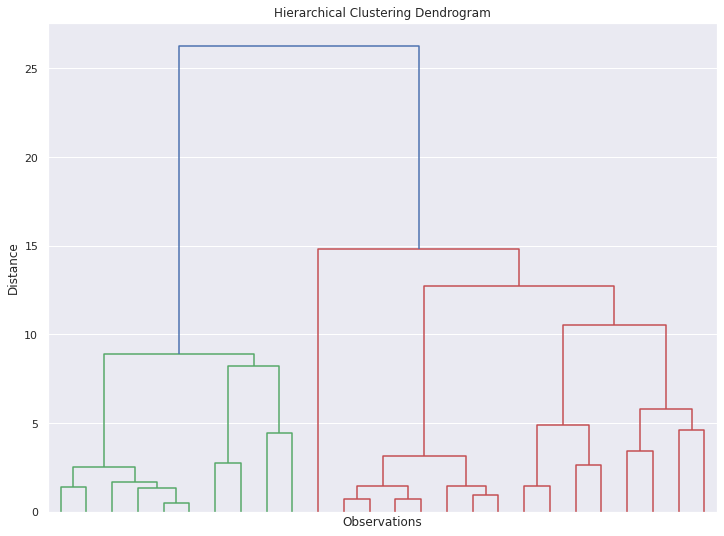

time: 220 ms


In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
sch.dendrogram(hierarc_clustering_full, truncate_mode ='level', p=5, show_leaf_counts = False, no_labels = True)
plt.show()

In [ ]:
reduced_data2 = PCA(n_components=2).fit_transform(data)

time: 31.4 ms


In [ ]:
hierarc_clustering_pca2 = sch.linkage(reduced_data2, method = 'ward')

time: 2.97 ms


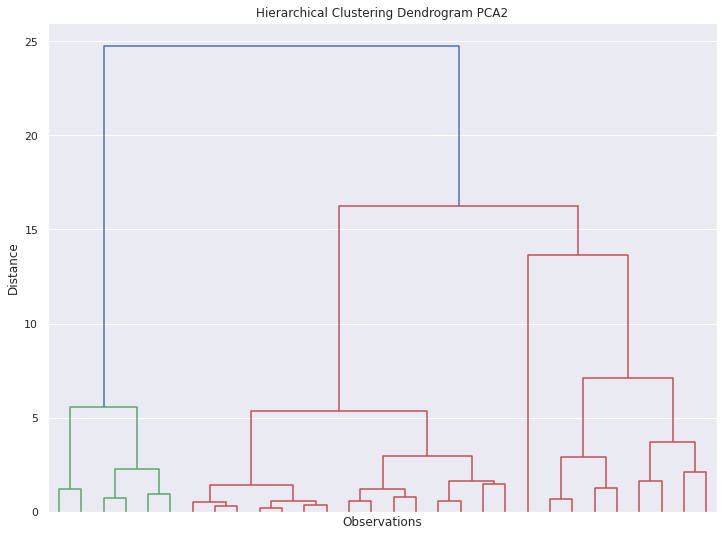

time: 204 ms


In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram PCA2')
plt.xlabel('Observations')
plt.ylabel('Distance')
sch.dendrogram(hierarc_clustering_pca2, truncate_mode ='level', p=5, show_leaf_counts = False, no_labels = True)
plt.show()

In [ ]:
reduced_data3 = PCA(n_components=3).fit_transform(data)

time: 5.67 ms


In [ ]:
hierarc_clustering_pca3 = sch.linkage(reduced_data3, method = 'ward')

time: 3.59 ms


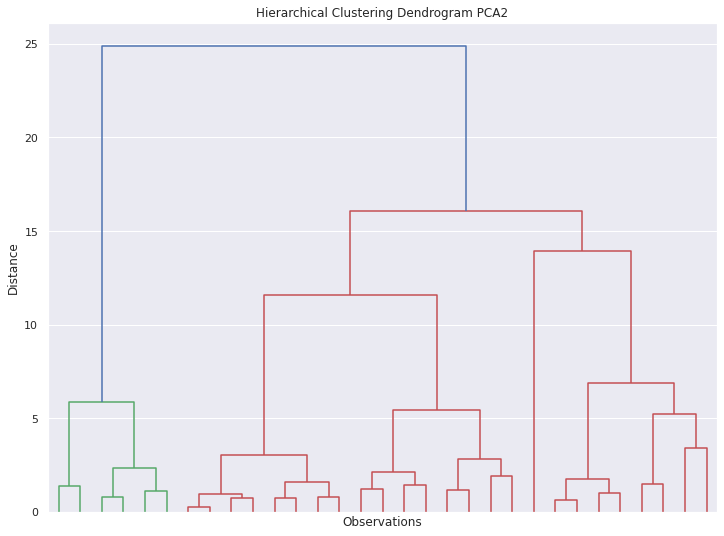

time: 195 ms


In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram PCA2')
plt.xlabel('Observations')
plt.ylabel('Distance')
sch.dendrogram(hierarc_clustering_pca3, truncate_mode ='level', p=5, show_leaf_counts = False, no_labels = True)
plt.show()

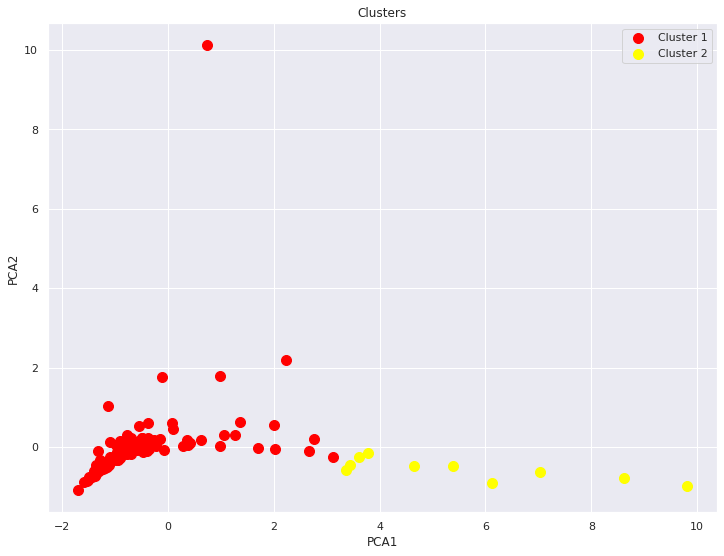

time: 363 ms


In [ ]:
#2 clusters
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
#plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

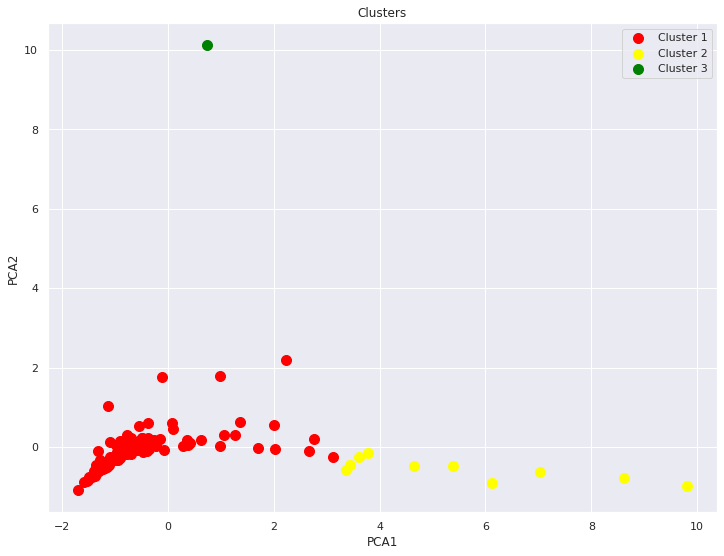

time: 371 ms


In [ ]:
#3 clusters
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

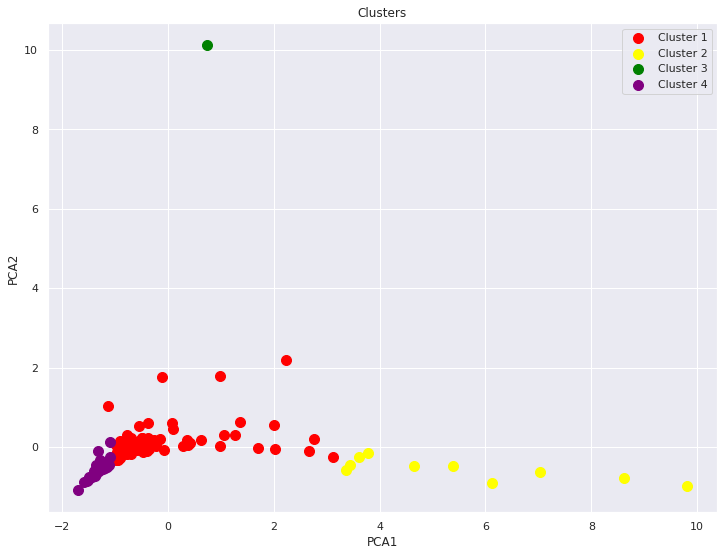

time: 401 ms


In [ ]:
#4 clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

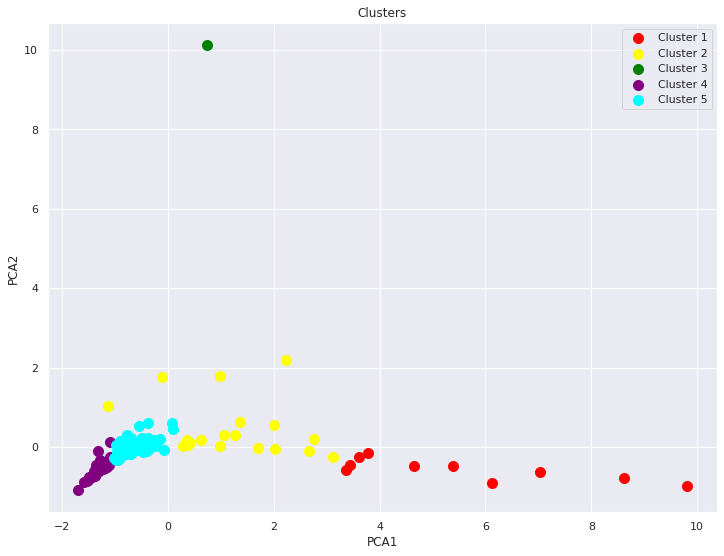

time: 401 ms


In [ ]:
#5 clusters
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### Kmeans

#### Elbow method dataset no standardization

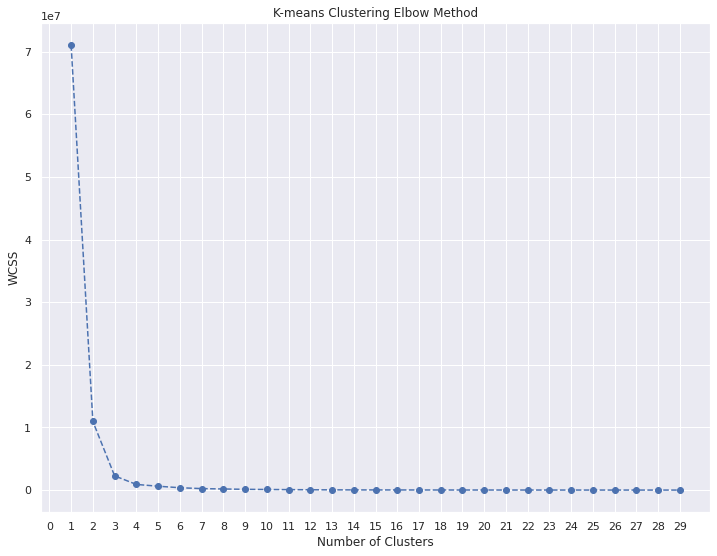

time: 2.11 s


In [ ]:
wcss =[]
for i in range(1,30):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(df)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,30),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 30, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

#### Elbow method dataset standardized

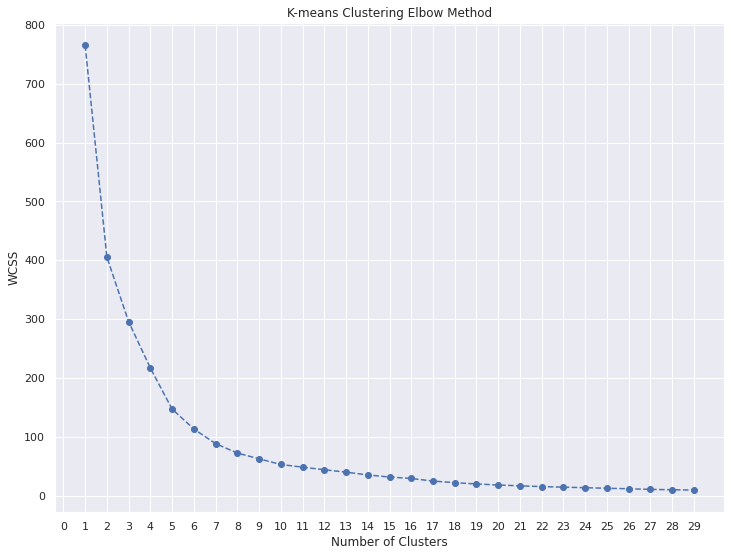

time: 2.42 s


In [ ]:
wcss =[]
for i in range(1,30):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(data)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,30),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 30, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

#### Elbow method dataset PCA2

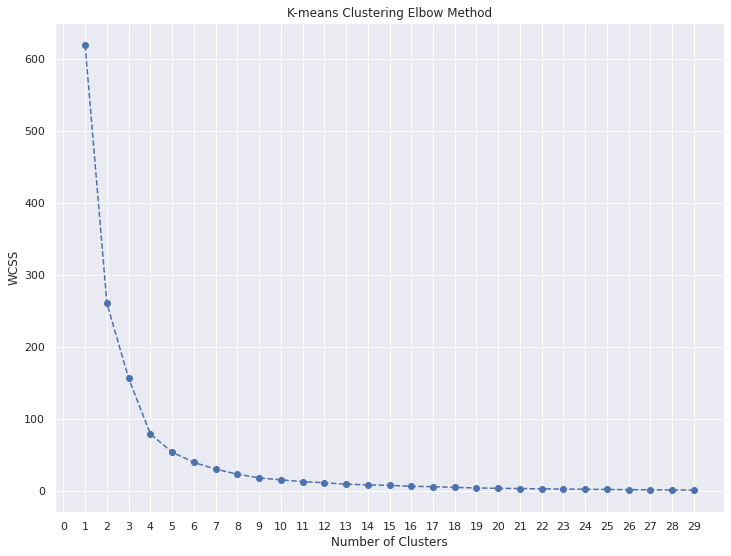

time: 2.14 s


In [ ]:
wcss =[]
for i in range(1,30):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(reduced_data2)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,30),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 30, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

#### Elbow method dataset PCA3

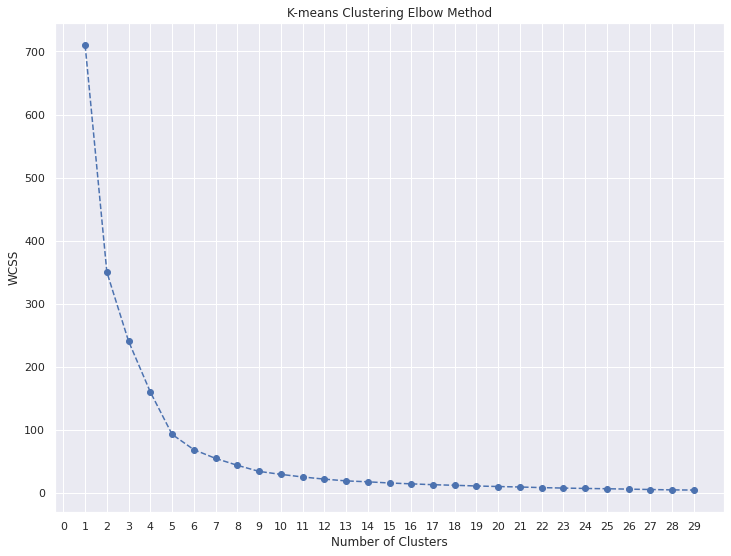

time: 2.25 s


In [ ]:
wcss =[]
for i in range(1,30):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(reduced_data3)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,30),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 30, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

### Drawing the clusters with kmeans

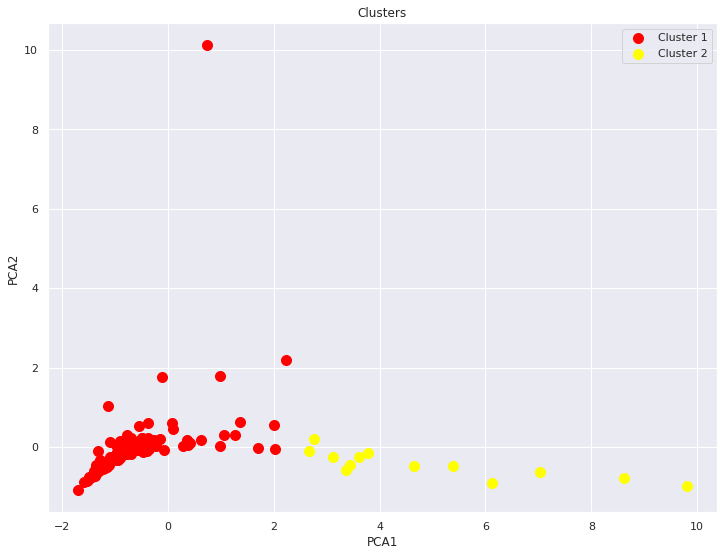

time: 385 ms


In [ ]:
#2 clusters
hc = KMeans(n_clusters = 2, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
#plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

Clustering metrics - unsupervised
Silhouette:  0.6814442051270582
Davies-Bouldin Index:  0.6724930972441733
Calinski-Harabasz Index:  110.97675731344869
time: 14.6 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


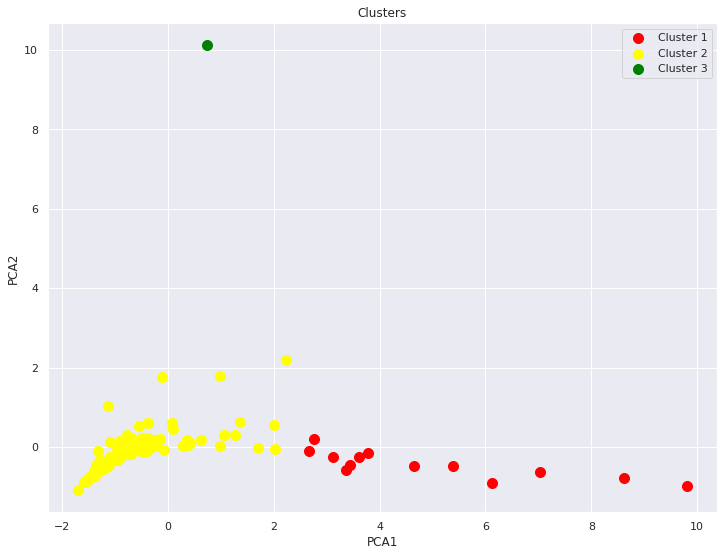

time: 392 ms


In [ ]:
#3 clusters
hc = KMeans(n_clusters = 3, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

Clustering metrics - unsupervised
Silhouette:  0.6919549447819817
Davies-Bouldin Index:  0.5116555284085208
Calinski-Harabasz Index:  98.437046796663
time: 16 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


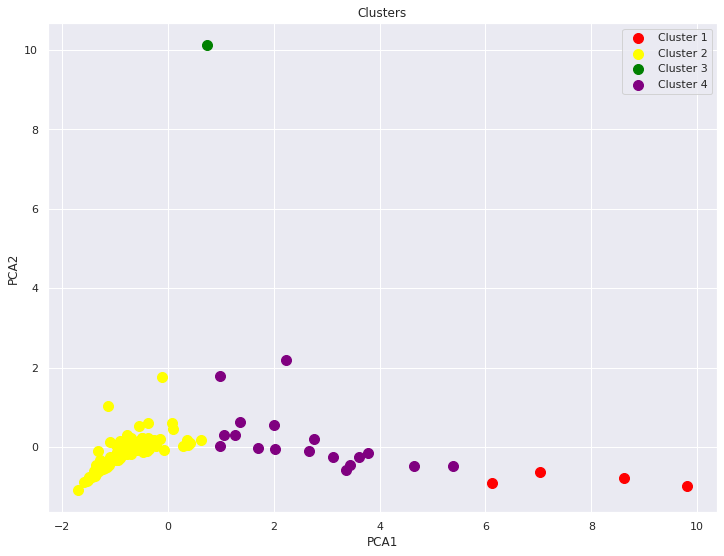

time: 417 ms


In [ ]:
#4 clusters
hc = KMeans(n_clusters = 4, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

Clustering metrics - unsupervised
Silhouette:  0.5898993460456123
Davies-Bouldin Index:  0.694731203439259
Calinski-Harabasz Index:  103.69518239284635
time: 21.3 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


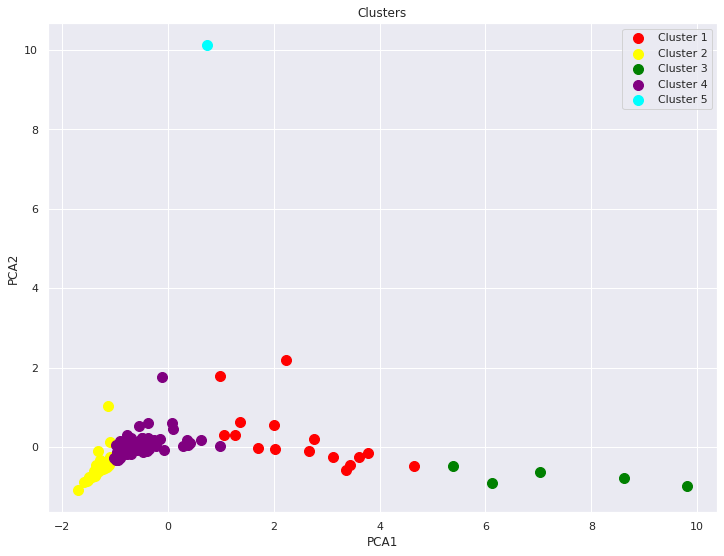

time: 423 ms


In [ ]:
#5 clusters
hc = KMeans(n_clusters = 5, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

Clustering metrics - unsupervised
Silhouette:  0.49672559775266206
Davies-Bouldin Index:  0.686517188065513
Calinski-Harabasz Index:  128.07072669532437
time: 19.1 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

time: 60.3 ms


In [ ]:
countries = pd.DataFrame(world['name'])

time: 32.8 ms


In [ ]:
countries.to_csv('countries.csv')

time: 199 ms


### Alternative visualization of clusters

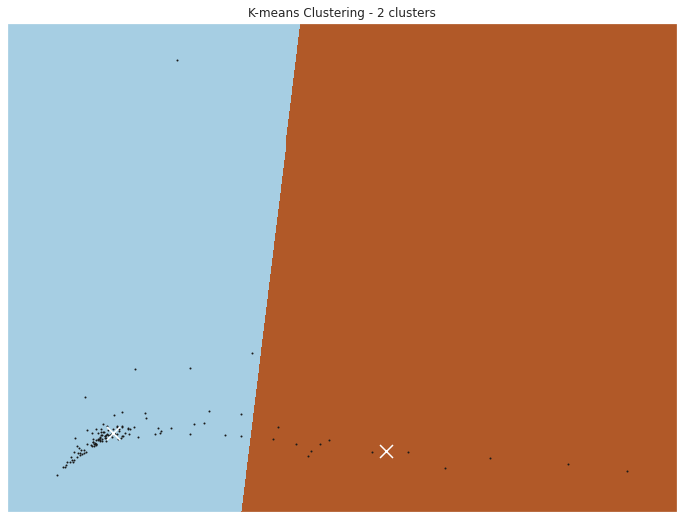

time: 419 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 2 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

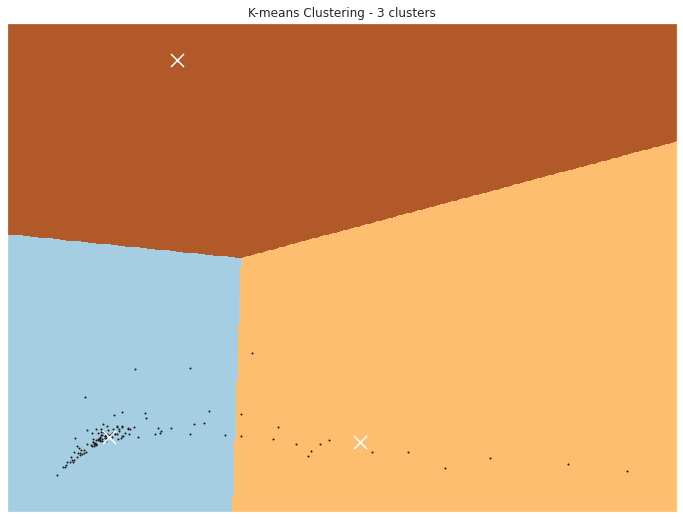

time: 500 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 3 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

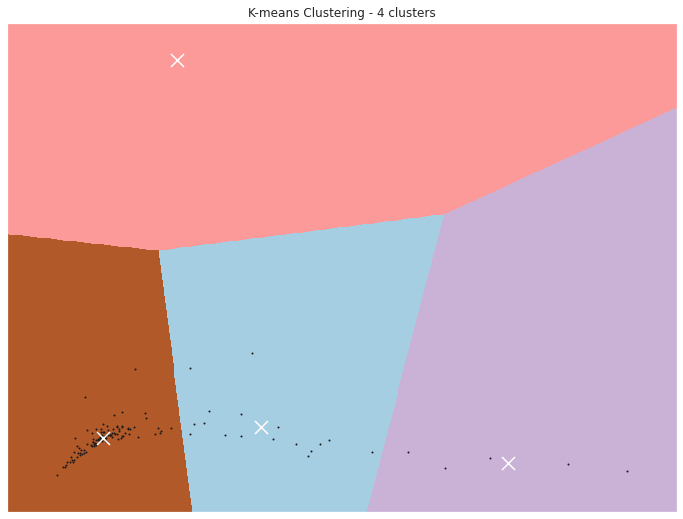

time: 565 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 4 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

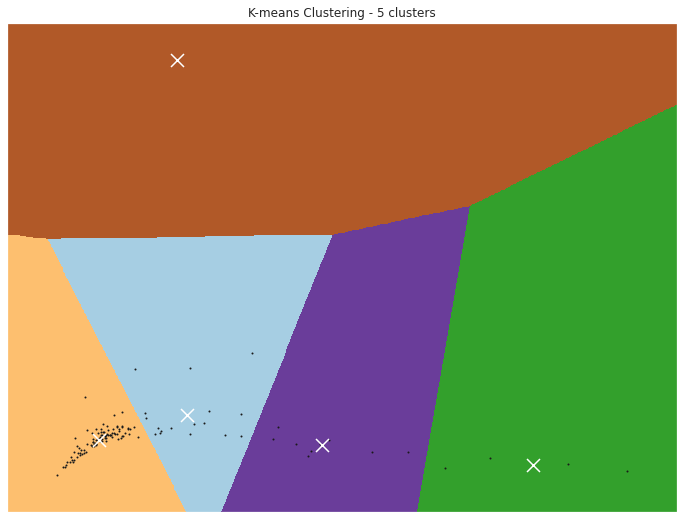

time: 589 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 5 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Map generation

# begin looping

In [ ]:
#X clusters
hc = KMeans(n_clusters = 5, random_state=42)
y_hc = hc.fit_predict(data)
y_hc.shape

predictions = pd.Series(y_hc, index=df.index)
df['predict'] = pd.Series(predictions)
df['predict'].to_csv('predictions.csv')

time: 169 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


# manual change countries.csv with values from predictions.csv and rename both

In [ ]:
countries = pd.read_csv('countries.csv')

time: 12.3 ms


# end looping

In [ ]:
world['predictions'] = countries['predictions']

time: 5 ms


In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,predictions
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.0


time: 36.3 ms


Text(0.5, 1.0, '2 clusters')

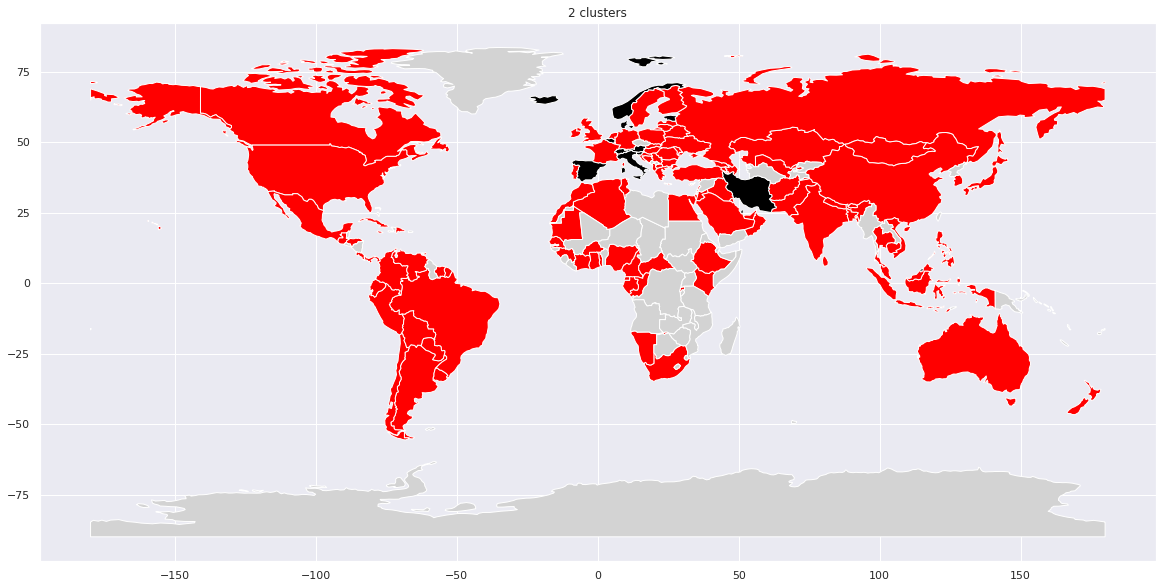

time: 662 ms


In [ ]:
ax = world.plot(column='predictions', cmap='flag', figsize=(20,10), missing_kwds={'color': 'lightgrey'})
ax.set_title("2 clusters")

Text(0.5, 1.0, '3 clusters')

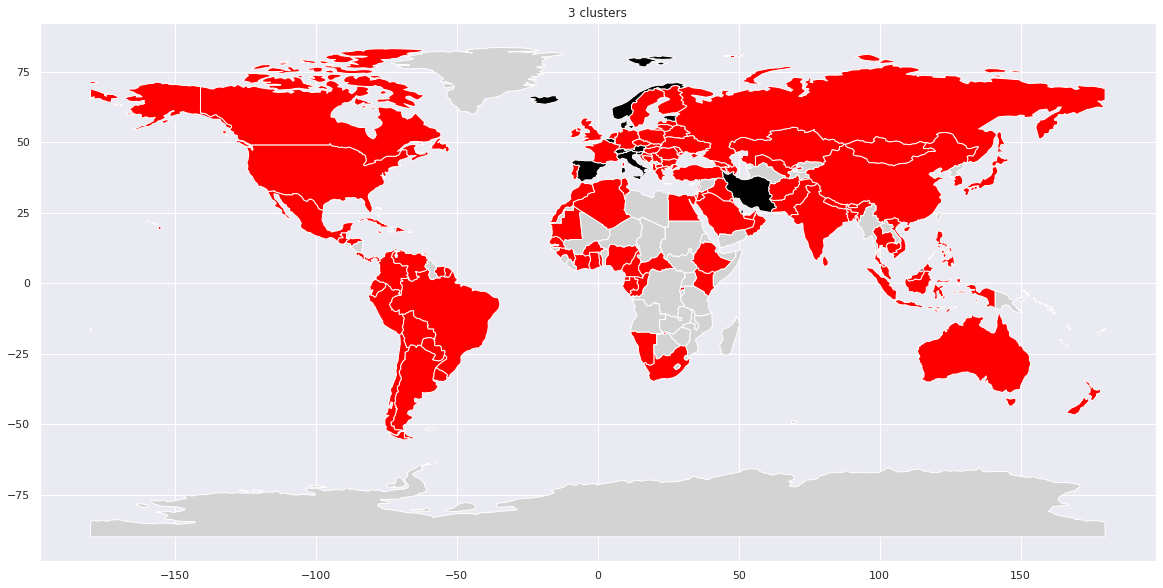

time: 658 ms


In [ ]:
ax = world.plot(column='predictions', cmap='flag', figsize=(20,10), missing_kwds={'color': 'lightgrey'})
ax.set_title("3 clusters")
#o 3o cluster é só singapura

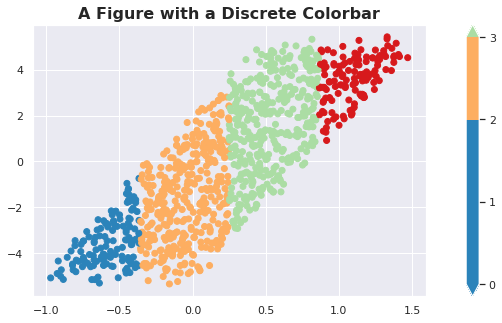

time: 456 ms


In [ ]:
import matplotlib as mpl
# Setting the figure size 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 5), gridspec_kw = {'width_ratios':[3, 0.1]})

# Initializing the data
num = 1000
x1 = np.linspace(-0.5,1,num) + (0.5 - np.random.rand(num))
y1 = np.linspace(-5,5,num) + (0.5 - np.random.rand(num))

# Initializing colors and building a colormap
cmap = mpl.colors.ListedColormap(['#2b83ba', '#fdae61', '#abdda4', '#d7191c'])

# Setting the Colormap
ax1.scatter(x1, y1, c=x1, cmap=cmap)
ax1.set_title('A Figure with a Discrete Colorbar', fontsize=16, weight='bold')

# Setting the Discrete Colorbar
bounds = [0, 1, 2, 3]
mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                boundaries=[0] + bounds + [10],
                                extend='both',
                                ticks=bounds,spacing='proportional') 

# Displaying the figure
plt.show()

Text(0.5, 1.0, '4 clusters')

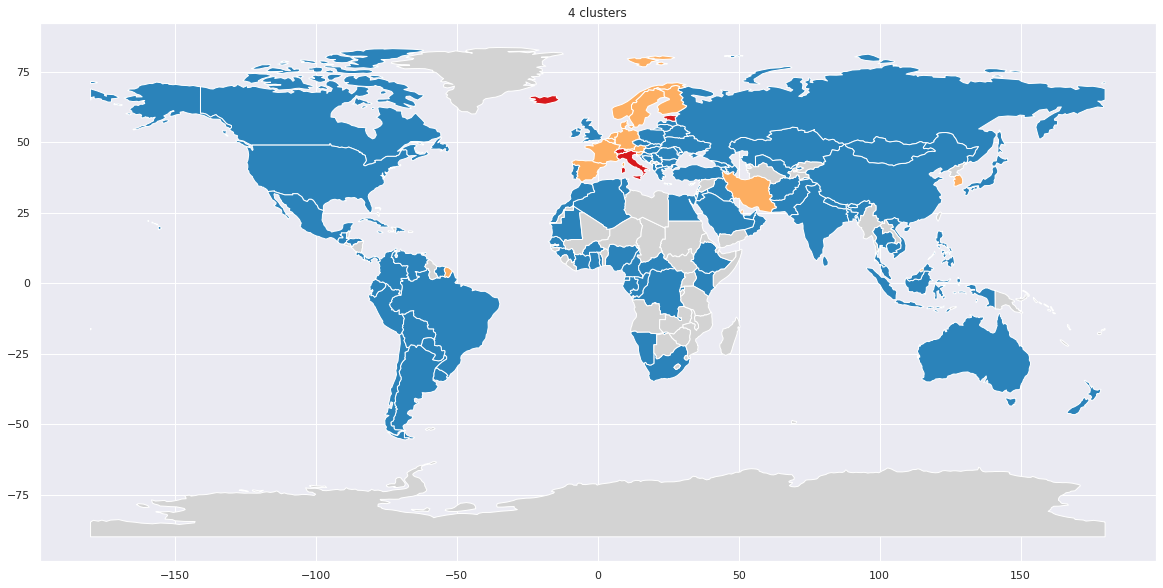

time: 819 ms


In [ ]:
ax = world.plot(column='predictions', cmap=cmap, figsize=(20,10), missing_kwds={'color': 'lightgrey'})
ax.set_title("4 clusters")
#singapura continua com um cluster proprio

Text(0.5, 1.0, '5 clusters')

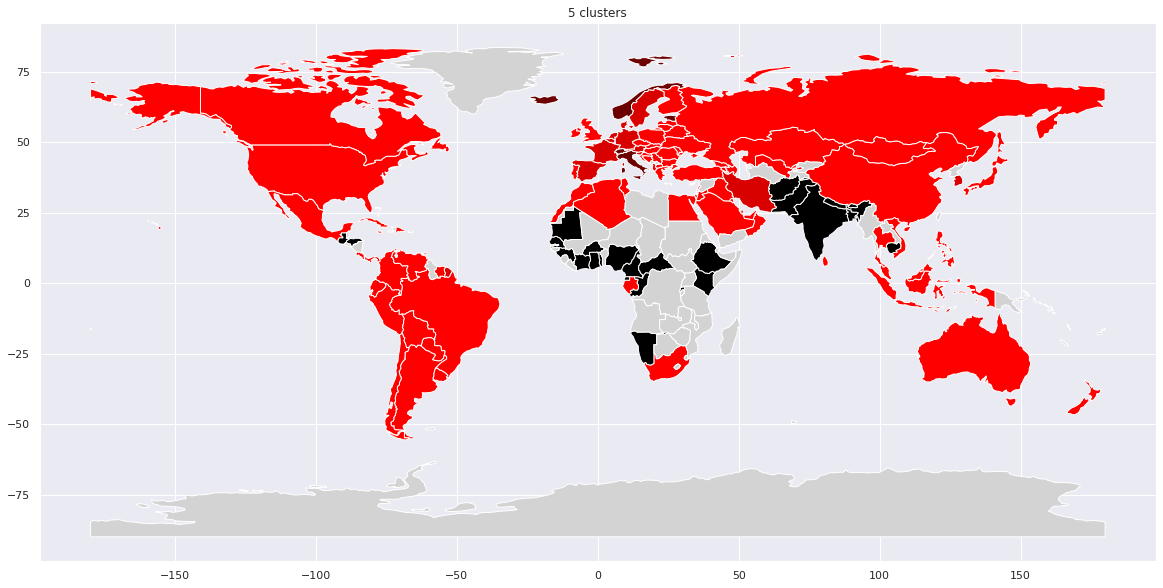

time: 636 ms


In [ ]:
ax = world.plot(column='predictions', cmap='flag', figsize=(20,10), missing_kwds={'color': 'lightgrey'})
ax.set_title("5 clusters")
#singapura continua com um cluster proprio